# Homework 2: U.S. Boundary Currents

Name: Stanley Nguyen

Date: 9/2/2024

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_evel = xr.open_dataset("EVEL_2015_12.nc")
ds_nvel = xr.open_dataset("NVEL_2015_12.nc")

In [21]:
# store the velocity components and longitude/latitude data
# into numpy arrays
np_evel = np.array(ds_evel['EVEL'])
np_nvel = np.array(ds_nvel['NVEL'])

longitude = np.array(ds_evel['longitude'])
latitude = np.array(ds_evel['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

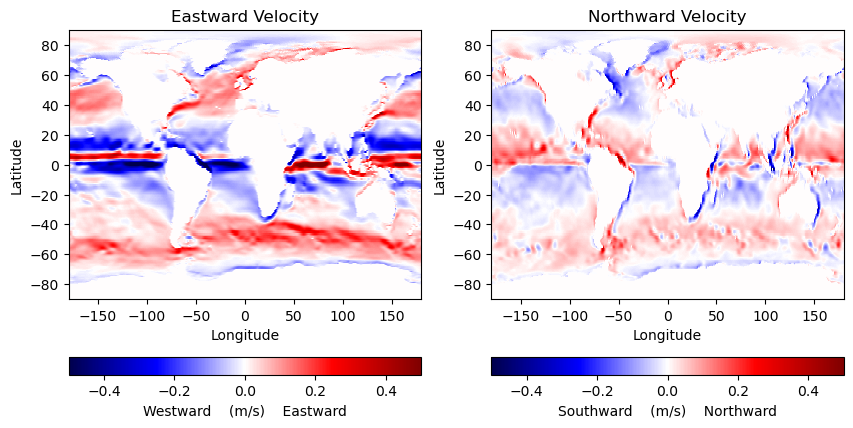

In [96]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(longitude, latitude, np_evel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label="Westward    (m/s)    Eastward")
plt.title('Eastward Velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(longitude, latitude, np_nvel[0, 0, :, :], vmin=-0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal', label="Southward    (m/s)    Northward")
plt.title('Northward Velocity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

### Answers:
1. At 30N on the east coast of the US, the surface currents move **northeast**.
   At 30N on the west coast, the surface currents move **southeast**.

   At 45N on the east coast, the surface currents move **southeast**.
   At 45N on the west coast, the surface currents move **southeast**.

2. The currents on the east coast appear to move faster.

3. The currents on the east coast are part of the North Atlantic gyre, which goes in a clockwise direction in the North Atlantic Ocean. The east coast currents reflect that by moving northeast, following the direction of the gyres. As water reaches the east coast, it travels northeast and as it goes, it starts to travel southeast along with the gyre.

   The currents in the west coast are part of the North Pacific gyre, which goes in a clockwise direction in the North Pacific gyre. The west coast currents follow the gyre by travelling southeast towards the top of the west coast, transitioning to travel northwest towards the bottom of the coast.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [12]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset("THETA_2015_12.nc")

In [38]:
# store the THETA grid into a into numpy array
np_theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

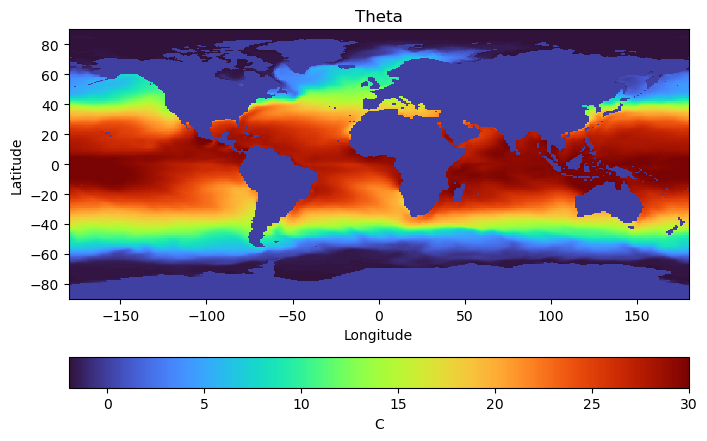

In [61]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
C = plt.pcolormesh(longitude, latitude, np_theta[0, 0, :, :], vmin=-2, vmax=30, cmap='turbo')
plt.colorbar(C, orientation='horizontal', label='C')
plt.title("Theta")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

### Answers:

1. The temperature on the west coast of the US appears to be colder than the temperatures on the east coast at the same latitude.

2. Ocean currents may contribute to this because on the west coast, currents from the north flow in from the North Pacific Gyre and on the east coast, currents from the equator flow in from the North Atlantic Gyre.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [72]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvel = xr.open_dataset("WVELSTAR_2015_12.nc")

In [115]:
# store the WVELSTAR grid into a into numpy array
np_wvel = np.array(ds_wvel['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [68]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?
np_depth = np.array(ds_wvel['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

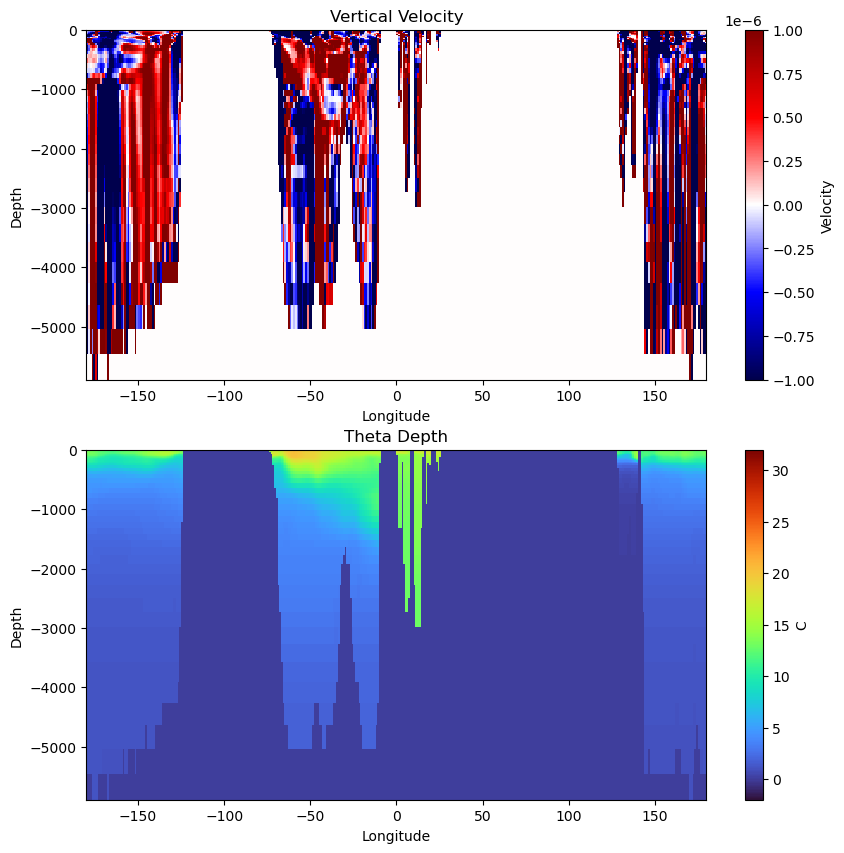

In [119]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)
C = plt.pcolormesh(longitude, np_depth, np_wvel[0,:,259,:], vmin=-.000001, vmax=.000001, cmap='seismic')
plt.colorbar(C, label='Velocity')
plt.title('Vertical Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude')

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)
C = plt.pcolormesh(longitude, np_depth, np_theta[0,:,259,:], vmin=-2, vmax=32, cmap='turbo')
plt.colorbar(C, label='C')
plt.title('Theta Depth')
plt.ylabel('Depth')
plt.xlabel('Longitude')
plt.show()

### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

### Answers:

1. The vertical velocity on both coasts appear to be moving down right against the coastline. Slightly out from the coast, the velocity on the west coast is moving upward, while the velocity on the east coast has a mix of both downward and upward velocity.

2. The speed of vertical velocity seems much lower than horizontal velocity. Horizontal velocity is propelled by the Earth's rotation and wind, while vertical velocity is propelled by water rising and sinking due to the difference in temperature/density.

3. The vertical currents adjacent to the coastline go down, which may decrease surface temperature by forcing warm water to sink.

4. The winds flowing south may push cold water from up north down towards the west coast, causing the temperatures to be colder towards the surface. Since water is now colder at the surface, the water from underneath rises, leading to a higher vertical velocity on the west coast.